In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gdf = gpd.read_file("losangeles.gpkg")

In [5]:
cdc_data_15 = pd.read_csv('500_cities_data_15.csv')
cdc_data_21 = pd.read_csv('500_cities_data_21.csv')
cdc_data_22 = pd.read_csv('500_cities_data_22.csv')

In [ ]:
cdc_data_15 = cdc_data_15.rename(columns={
    "MHLTH_CrudePrev": "MentalHealth_2015"
})
cdc_data_21 = cdc_data_21.rename(columns={
    "MHLTH_CrudePrev": "MentalHealth_2021"
})
# cdc_data_22 = cdc_data_22.rename(columns={
#     "MHLTH_CrudePrev": "MentalHealth_2022"
# })

In [ ]:
# Filter rows for Los Angeles from 500 cities and places data
la_df = cdc_data_22[cdc_data_22["CountyName"].str.contains("Los Angeles", case=False, na=False)].copy()


In [4]:
la_df["TractFIPS"] = la_df["TractFIPS"].astype(str)
gdf["GEOID"] = gdf["GEOID"].astype(str)
gdf["GEOID"] = gdf["GEOID"].str.replace(".0", "", regex=False)

# Perform a LEFT JOIN (all LA tracts kept, only matching gentrification data merged)
merged_df = la_df.merge(
    gdf,
    how="left",
    left_on="TractFIPS",
    right_on="GEOID"
)

print("Merged dataframe shape:", merged_df.shape)
print("Gentrification data available for:", merged_df['GEOID'].notna().sum(), "tracts")


Merged dataframe shape: (2474, 91)
Gentrification data available for: 2000 tracts


In [ ]:
# see what didnt merge, seee diffrent kind of merge

In [5]:
cols_to_keep = [
    "TractFIPS",
    "TotalPopulation",
    "TotalPop18plus",
    "MHLTH_CrudePrev",
    "EMOTIONSPT_CrudePrev",
    "Geolocation",
    "GEOID",
    "Typology",
    "geometry"
]
merged_gdf = gpd.GeoDataFrame(merged_df, geometry="geometry", crs=gdf.crs)

merged_gdf_subset = merged_gdf[cols_to_keep].copy()

In [6]:
# merged_gdf_subset.plot(
#     column="Typology",
#     legend=True,
#     figsize=(30, 25),
#     cmap="viridis",
#     edgecolor="black",
#     linewidth=0.2
# )

# # Model-based estimate for crude prevalence of frequent mental distress among adults, 2022
    
# merged_gdf_subset.plot(
#     column="MHLTH_CrudePrev",
#     legend=True,
#     figsize=(30, 25),
#     cmap="viridis",
#     edgecolor="black",
#     linewidth=0.2
# )


# gdf_plot = merged_gdf_subset.copy()
# gdf_plot = gpd.GeoDataFrame(gdf_plot, geometry="geometry")
# gdf_plot = gdf_plot[gdf_plot.is_valid]

# fig, ax = plt.subplots(1, 1, figsize=(30, 25))
# # Plot heatmap of mental health prevalence
# gdf_plot.plot(
#     column="MHLTH_CrudePrev",
#     cmap="YlOrRd",
#     legend=True,
#     ax=ax,
#     edgecolor="grey",
#     linewidth=0.2
# )

# # Overlay typology boundaries
# typology_categories = gdf_plot["Typology"].unique()
# colors = ["blue", "green", "purple", "orange"]

# for i, cat in enumerate(typology_categories):
#     gdf_plot[gdf_plot["Typology"] == cat].boundary.plot(
#         ax=ax,
#         edgecolor=colors[i % len(colors)],
#         linewidth=0.5,
#         label=cat
#     )

# ax.legend(title="Typology")
# ax.set_axis_off()
# plt.title("LA Tracts: Mental Health Heatmap with Typology Boundaries")
# plt.show()


In [7]:
merged_gdf_subset.columns

Index(['TractFIPS', 'TotalPopulation', 'TotalPop18plus', 'MHLTH_CrudePrev',
       'EMOTIONSPT_CrudePrev', 'Geolocation', 'GEOID', 'Typology', 'geometry'],
      dtype='object')

In [9]:
import pandas as pd

# Mean for each Typology
mean_summary = merged_gdf_subset.groupby("Typology")[["MHLTH_CrudePrev", "EMOTIONSPT_CrudePrev"]].mean().reset_index()

print(mean_summary.sort_values("MHLTH_CrudePrev", ascending=False))


                                  Typology  MHLTH_CrudePrev  \
5                  High Student Population        22.976190   
2                At Risk of Gentrification        21.412195   
7                     Ongoing Displacement        20.489286   
6   Low-Income/Susceptible to Displacement        20.305198   
4             Early/Ongoing Gentrification        19.171910   
10          Unavailable or Unreliable Data        18.635714   
0                  Advanced Gentrification        17.300758   
3                       Becoming Exclusive        16.044944   
8             Stable Moderate/Mixed Income        15.938652   
1            At Risk of Becoming Exclusive        15.753982   
9                Stable/Advanced Exclusive        13.278893   

    EMOTIONSPT_CrudePrev  
5              34.871429  
2              38.709756  
7              37.651190  
6              37.565281  
4              36.598315  
10             35.514286  
0              34.295455  
3              30.426966  


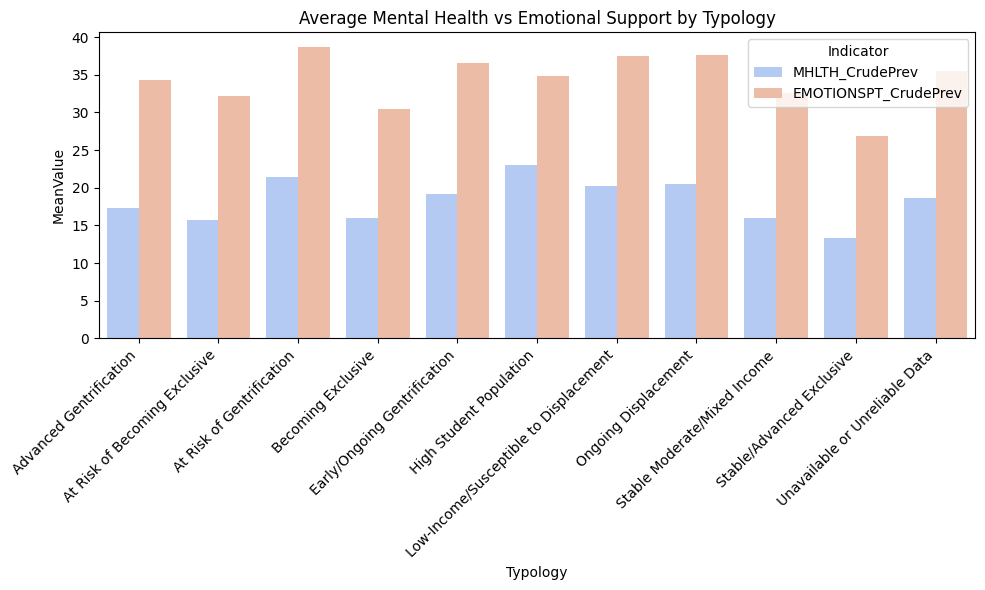

In [10]:
mean_summary_melted = mean_summary.melt(id_vars="Typology", var_name="Indicator", value_name="MeanValue")

plt.figure(figsize=(10,6))
sns.barplot(x="Typology", y="MeanValue", hue="Indicator", data=mean_summary_melted, palette="coolwarm")
plt.title("Average Mental Health vs Emotional Support by Typology")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [ ]:
# find stuff for 2019, maybe isolation and then plot overtime things. 

In [ ]:
# add confidence intervals. see which tract takes the most space. can do value counts or how many obsservations per category

In [ ]:
# get mental health data for 2018 so we  can do 1 on one comaprison

C:\Users\dhair\AppData\Local\Temp\ipykernel_15816\1412142028.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Typology", y="MHLTH_CrudePrev", data=merged_gdf_subset, palette="Set2")


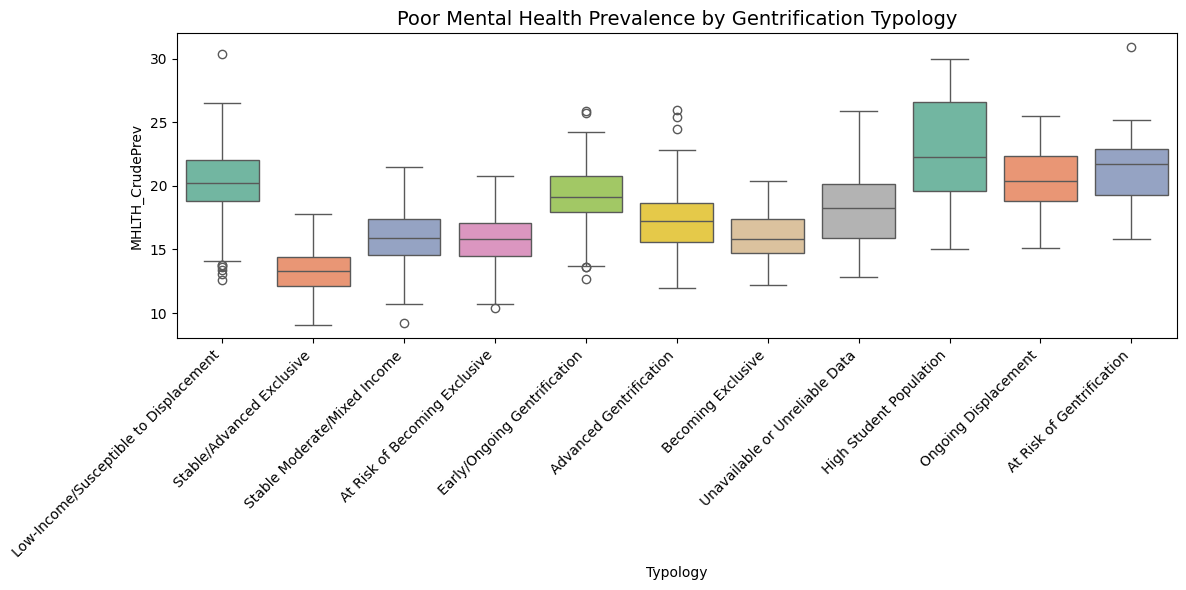

C:\Users\dhair\AppData\Local\Temp\ipykernel_15816\1412142028.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Typology", y="EMOTIONSPT_CrudePrev", data=merged_gdf_subset, palette="Set3")


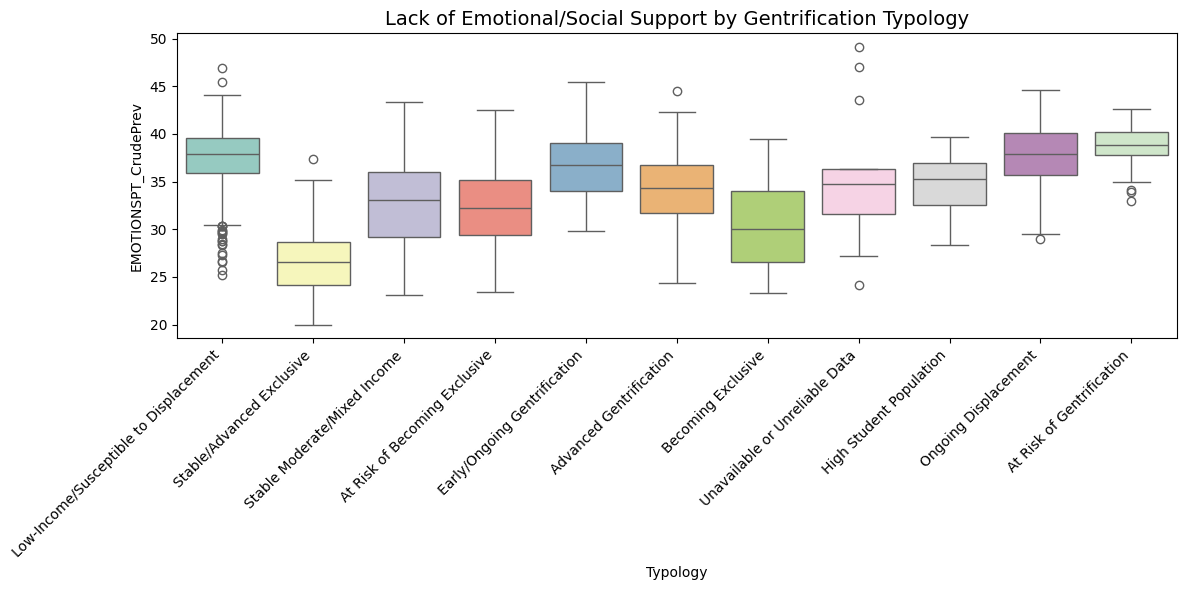

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.boxplot(x="Typology", y="MHLTH_CrudePrev", data=merged_gdf_subset, palette="Set2")
plt.title("Poor Mental Health Prevalence by Gentrification Typology", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x="Typology", y="EMOTIONSPT_CrudePrev", data=merged_gdf_subset, palette="Set3")
plt.title("Lack of Emotional/Social Support by Gentrification Typology", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [ ]:
# 